In [18]:
import pandas as pd

In [28]:
sales = pd.read_csv('uriage.csv')
sales.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [29]:
# item_name列を整形
sales['item_name'] = sales['item_name'].str.upper()
sales['item_name'] = sales['item_name'].str.replace(' ', '')
sales['item_name'] = sales['item_name'].str.replace('　', '')
sales.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商品S,NaN,浅田賢二
2,2019-05-11 19:42:07,商品A,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品A,NaN,平田鉄二


In [30]:
# 商品マスタを作る
item_master = sales[['item_name', 'item_price']]
item_master = item_master.drop_duplicates()
item_master = item_master.dropna()
item_master.sort_values(by='item_name')

,item_name,item_price
0,商品A,100.0
42,商品B,200.0
15,商品C,300.0
56,商品D,400.0
36,商品E,500.0
43,商品F,600.0
21,商品G,700.0
65,商品H,800.0
17,商品I,900.0
74,商品J,1000.0


In [31]:
# salesからitem_name列を削除
sales = sales.drop('item_price', axis=1)
sales.head()

,purchase_date,item_name,customer_name
0,2019-06-13 18:02:34,商品A,深井菜々美
1,2019-07-13 13:05:29,商品S,浅田賢二
2,2019-05-11 19:42:07,商品A,南部慶二
3,2019-02-12 23:40:45,商品Z,麻生莉緒
4,2019-04-22 03:09:35,商品A,平田鉄二


In [32]:
# salesと結合する
sales2 = pd.merge(sales, item_master, on='item_name', how='left')
sales2.head()

,purchase_date,item_name,customer_name,item_price
0,2019-06-13 18:02:34,商品A,深井菜々美,100.0
1,2019-07-13 13:05:29,商品S,浅田賢二,1900.0
2,2019-05-11 19:42:07,商品A,南部慶二,100.0
3,2019-02-12 23:40:45,商品Z,麻生莉緒,2600.0
4,2019-04-22 03:09:35,商品A,平田鉄二,100.0


In [38]:
# 商品ごとの売上合計
sales2.groupby('item_name')['item_price'].sum()

,item_price
item_name,
商品A,13900.0
商品B,22600.0
商品C,39900.0
商品D,50000.0
商品E,52500.0
商品F,75600.0
商品G,77000.0
商品H,87200.0
商品I,102600.0


<Axes: ylabel='item_name'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


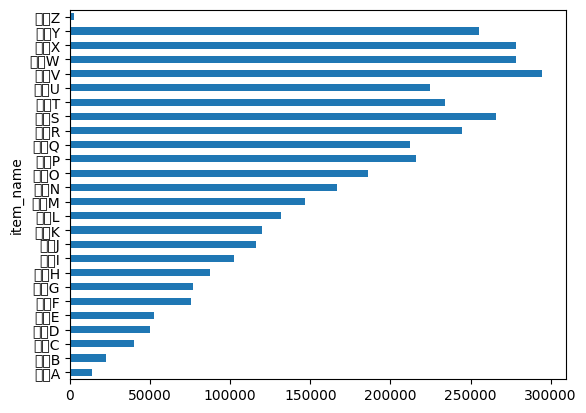

In [40]:
sales2.groupby('item_name')['item_price'].sum().plot(kind='barh')